# Modelling of physical systems - assignment for lab04
## Author: Przemysław Maresz

## Advection-Diffusion Problem

The advection-diffusion equation describes the transport of a scalar quantity, such as heat, pollutants, or chemical concentrations, due to both advection (bulk movement of the medium) and diffusion (spreading due to molecular motion). It is given by:

$$
\frac{\partial \psi}{\partial t} + u \frac{\partial \psi}{\partial x} = D \frac{\partial^2 \psi}{\partial x^2}
$$

where:
- $ \psi(x,t) $ is the concentration at position $ x $ and time $ t $,
- $ u $ is the advection velocity (bulk transport),
- $ D $ is the diffusion coefficient.

This problem has many real-world applications, such as pollutant dispersion in air or water, heat conduction in moving fluids, and reactive transport in porous media.

In [446]:
import numpy as np
from matplotlib import pyplot
import math

In [447]:
class AnalyticSolution:
  def __init__(self, u, D):
    self.u = u
    self.D = D

  def __call__(self, x, t):
    return (
        np.exp(
            -(np.square(self.u) / (4 * self.D)
            + np.square(np.pi) * self.D) * t
            ) * np.sin(np.pi * x)
        )

def F(psi_l, psi_r, C):
    return .5 * (C + abs(C)) * psi_l + \
           .5 * (C - abs(C)) * psi_r

class shift:
    def __init__(self, add, sub):
      self.add = add
      self.sub = sub

    def __radd__(self, o):
      return slice(o.start + self.add, o.stop + self.add)

    def __rsub__(self, o):
      return slice(o.start - self.sub, o.stop - self.sub)

In [448]:
u = 0.005
D = 0.01
t_max = 10
nt = 5000
dx = 0.0085
x = np.arange(0,1, dx)
nx = len(x)
dt = t_max / nt
C = np.zeros(nt-1)

i = slice(1, nx - 1)
im = slice(1, nx)
one = shift(add=1, sub=1)
hlf = shift(add=0, sub=1)

analytic = AnalyticSolution(u, D)
initial_analytic = analytic(x, 0)
final_analytic = analytic(x, t_max)
numeric = initial_analytic.copy()

In [449]:
for _ in range(nt):
  C[im - hlf] = dt / dx * (
      u - D * (numeric[im] - numeric[im - one])
      / dx * 2 / (numeric[im] + numeric[im - one]))

  assert max(abs(C)) <= 1

  numeric[i] -= (
      F(numeric[i], numeric[i+one], C[i+hlf])
      - F(numeric[i-one], numeric[i], C[i-hlf])
      )

mean_square_error = np.sum(abs(final_analytic[1:-1]-numeric[1:-1])/abs(final_analytic[1:-1])) / len(final_analytic[1:-1])
print(f'Mean square error: {mean_square_error}')

Mean square error: 0.1070727122876728


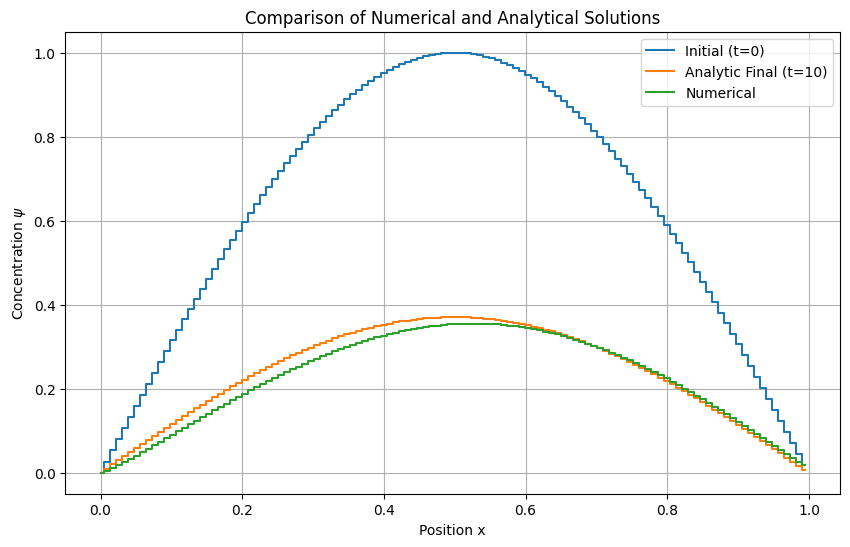

In [450]:
pyplot.figure(figsize=(10, 6))
pyplot.step(x, initial_analytic, label='Initial (t=0)', where='mid')
pyplot.step(x, final_analytic, label=f'Analytic Final (t={t_max})', where='mid')
pyplot.step(x, numeric, label=f'Numerical', where='mid')

pyplot.title('Comparison of Numerical and Analytical Solutions')
pyplot.xlabel('Position x')
pyplot.ylabel('Concentration $\psi$')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

## Conclusion
The simulation at $t=10$ shows a profile that is noticeably flattened due to diffusion. The numerical solution (green line) aligns well with the analytical solution (orange line), with only minor amplitude differences near the peak. The computed mean square error of approximately 10.7% suggests that the numerical scheme performs quite accurately considering the inherent approximations of the method. These discrepancies are mainly due to the chosen numerical approach, the discretization in time and space, and the approximations related to the CFL condition. Overall, the computational scheme effectively captures the essential behavior of the advection-diffusion process.